In [1]:
# Import nesessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Load data from pickle
df = pd.read_pickle("Loan_status.pkl")

In [4]:
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,499.0,0.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3

# Split Dataset into Training, Validation, Testing and Untouched Sets

In [5]:
# Dimension of training set
df.shape

(2925493, 142)

# Data Processing

## 1. Drop features with > 50% missing values

In [6]:
## Drop features with > 50% missing values
missing_percent = (df.isna().sum() / len(df))* 100
cols_to_drop = missing_percent[missing_percent > 50].index
print(cols_to_drop)
df_dropped = df.drop(columns=cols_to_drop)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'mths_since_recent_bc_dlq',
       'mths_since_recent_revol_delinq', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount'],
      dtype='object')


In [7]:
# Identify columns with string (object) content
string_columns = df_dropped.select_dtypes(include=['object']).columns.tolist()

# Display the list of column names containing string content
string_columns

['id',
 'term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'hardship_flag',
 'debt_settlement_flag']

# Categorize Predictor Variable to Loss, Good and Other

In [8]:
# create categories for loan status
loss = ['Charged Off', 'Does not meet the credit policy. Status:Charged Off', 'Default']
good = ['Fully Paid', 'Current', 'Does not meet the credit policy. Status:Fully Paid', 'Issued']
df_dropped['loan_category'] = df_dropped['loan_status'].apply(lambda x: 'Loss' if x in loss else ('Good' if x in good else 'Other'))

In [9]:
# filter only good and loss
df_dropped = df_dropped[df_dropped['loan_category'].isin(['Loss', 'Good'])]
# convert to numerical encoding
df_dropped['loan_cat_numerical'] = df_dropped['loan_category'].map({'Loss': 0, 'Good': 1})
df_dropped['loan_cat_numerical'].value_counts()

loan_cat_numerical
1    2532849
0     363742
Name: count, dtype: int64

# Add description column with existing borrower information from dataset

In [10]:
def generate_description(row):
    description = ""

    # Loan purpose and amount
    if pd.notna(row['purpose']):
        purpose_clean = row['purpose'].replace('_', ' ')
        description += f"I am applying for a ${int(row['loan_amnt']):,} loan to cover {purpose_clean}."
    else:
        description += f"I am applying for a ${int(row['loan_amnt']):,} loan."

    # Add title if it's different from purpose
    if pd.notna(row['title']) and pd.notna(row['purpose']):
        title_clean = str(row['title']).strip().lower()
        if title_clean != row['purpose'].replace('_', ' ').lower():
            description += f" More specifically, it is for {title_clean}."
    elif pd.notna(row['title']):
        title_clean = str(row['title']).strip().lower()
        description += f" More specifically, it is for {title_clean}."

    # Employment title and length
    emp_title = row['emp_title']
    emp_length = row['emp_length']

    if pd.notna(emp_title):
        description += f" I work at {emp_title.lower()}"
        if pd.notna(emp_length):
            emp_length_clean = emp_length.strip()
            if emp_length_clean == "10+ years":
                emp_length_clean = "over 10 years"
            elif emp_length_clean == "< 1 year":
                emp_length_clean = "less than 1 year"
            description += f" with {emp_length_clean} of experience"
        description += "."
    elif pd.notna(emp_length):
        emp_length_clean = emp_length.strip()
        if emp_length_clean == "10+ years":
            emp_length_clean = "over 10 years"
        elif emp_length_clean == "< 1 year":
            emp_length_clean = "less than 1 year"
        description += f" I have {emp_length_clean} of professional experience."

    # Income
    if pd.notna(row['annual_inc']):
        description += f" My annual income is approximately ${int(row['annual_inc']):,}."

    # Home ownership
    if pd.notna(row['home_ownership']):
        description += f" I currently {row['home_ownership'].lower()} my home."

    # Credit account info
    if pd.notna(row['open_acc']) and pd.notna(row['total_acc']):
        description += f" I have {int(row['open_acc'])} open credit accounts and {int(row['total_acc'])} total credit accounts."
    elif pd.notna(row['open_acc']):
        description += f" I have {int(row['open_acc'])} open credit accounts."
    elif pd.notna(row['total_acc']):
        description += f" I have {int(row['total_acc'])} total credit accounts."

    # Location
    if pd.notna(row['addr_state']):
        description += f" I am based in {row['addr_state']}."

    return description

In [11]:
df_dropped['description'] = df_dropped.apply(generate_description, axis=1)

In [12]:
df_dropped.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_category,loan_cat_numerical,description
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,May-2020,704.0,700.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,Good,1,"I am applying for a $5,000 loan to cover credi..."
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,Oct-2016,499.0,0.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,Loss,0,"I am applying for a $2,500 loan to cover car. ..."
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-2014,649.91,Jun-2017,739.0,735.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,Good,1,"I am applying for a $2,400 loan to cover small..."
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-2015,357.48,Apr-2016,604.0,600.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN

In [13]:
df_dropped['description'].iloc[17650]

'I am applying for a $3,000 loan to cover major purchase. More specifically, it is for personal pool. I work at east baton rouge school with 3 years of experience. My annual income is approximately $45,000. I currently mortgage my home. I have 25 open credit accounts and 36 total credit accounts. I am based in LA.'

# Risk Scoring using Chatgpt

Risk scoring with Chatgpt serves as the few-shot example in the tinyllama prompt section. 

In [ ]:
import openai
import re

client = openai.OpenAI(api_key="your-api")

def classify_risk_with_gpt(description):
    """
    Sends the loan description to GPT-4o-mini, gets 5 candidate risk scores,
    and returns the average score (rounded to two decimals).
    """
    prompt = (
        "You are a financial risk analysis assistant.\n"
        "Your task is to assess the loan risk level based on the applicant's description.\n"
        "Please respond with a single number between 0.00 and 1.00 (two decimal places), where:\n"
        "- 0.00 = Very Low Risk\n"
        "- 1.00 = Very High Risk\n\n"
        f"Loan Description:\n{description}\n\n"
        "Risk Score:"
    )

    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "You are a financial risk analysis assistant."},
                {"role": "user",   "content": prompt}
            ],
            temperature=1.2,
            n=5  # generate 5 candidate scores
        )

        scores = []
        for choice in response.choices:
            text = choice.message.content.strip()
            # match patterns like 0.00, 0.75, or 1.00
            match = re.search(r"\b(0(?:\.\d{1,2})?|1(?:\.00?)?)\b", text)
            if match:
                scores.append(float(match.group(1)))

        if not scores:
            return None

        # compute and return the average, rounded to two decimals
        avg_score = sum(scores) / len(scores)
        return round(avg_score, 2)

    except Exception as e:
        print("Error:", e)
        return None

In [17]:
def extract_info(description):
    """Parse out loan_amount, annual_income, years, home_ownership, open/total acc and compute dti."""
    info = {}
    # loan amount & income
    m = re.search(r'applying for a \$([0-9,]+)', description)
    info['loan_amount'] = int(m.group(1).replace(',', '')) if m else None
    m = re.search(r'annual income is approximately \$([0-9,]+)', description)
    info['annual_income'] = int(m.group(1).replace(',', '')) if m else None
    # years
    m = re.search(r'(\d+)\s+years', description)
    info['employment_years'] = int(m.group(1)) if m else 0
    # home ownership
    low = description.lower()
    info['home_ownership'] = (
        'Rent'     if 'rent my home'     in low else
        'Mortgage' if 'mortgage my home' in low else
        'Own'      if 'own my home'      in low else
        'Unknown'
    )
    # accounts
    m = re.search(r'I have (\d+) open credit accounts', description)
    info['open_acc'] = int(m.group(1)) if m else None
    m = re.search(r'and (\d+) total credit accounts', description)
    info['total_acc'] = int(m.group(1)) if m else None
    # DTI
    if info['loan_amount'] and info['annual_income']:
        info['dti'] = info['loan_amount'] / info['annual_income']
    else:
        info['dti'] = None
    return info


In [18]:
def assign_risk_label(score):
    """Bucket risk_score into low/medium/high."""
    if score <= 0.33:
        return 'low'
    elif score <= 0.66:
        return 'medium'
    else:
        return 'high'

In [19]:
chatgpt_samples = df_dropped.sample(50, random_state=400)
chatgpt_examples = []
for desc in chatgpt_samples['description']:
    score = classify_risk_with_gpt(desc)
    if score is not None:
        chatgpt_examples.append({
            "description": desc,
            "risk_score": round(score, 2)
        })

In [20]:
df_chatgpt = pd.DataFrame(chatgpt_examples)
df_chatgpt['risk_label'] = df_chatgpt['risk_score'].apply(assign_risk_label)

In [21]:
# extract structured fields
parsed = df_chatgpt['description'].apply(extract_info).apply(pd.Series)
df_chatgpt = pd.concat([df_chatgpt, parsed], axis=1)


In [22]:
counts = df_chatgpt['risk_label'] \
           .value_counts() \
           .reindex(['low','medium','high'], fill_value=0)
print("Sample counts by risk category:")
print(counts.to_string())

for cat in ['low','medium','high']:
    subset = df_chatgpt[df_chatgpt['risk_label'] == cat]
    print(f"\n--- {cat.upper()} ({len(subset)} samples) ---")
    print(subset[['description','risk_score']].to_string(index=False))

Sample counts by risk category:
risk_label
low       18
medium    30
high       2

--- LOW (18 samples) ---
                                                                                                                                                                                                                                                                                                               description  risk_score
                                                 I am applying for a $12,000 loan to cover debt consolidation. I work at marketing manager with 5 years of experience. My annual income is approximately $98,000. I currently rent my home. I have 10 open credit accounts and 19 total credit accounts. I am based in CA.        0.30
                                                                  I am applying for a $1,500 loan to cover other. I work at admin. secretary  with 6 years of experience. My annual income is approximately $38,000. I currently own my home. 

In [23]:
# ----------------------
# Aggregate key metrics
# ----------------------
metrics = []
order = ['low','medium','high']
for label in order:
    grp = df_chatgpt[df_chatgpt['risk_label'] == label]
    metrics.append({
        'risk_label':               label,
        'sample_count':             len(grp),
        'avg_dti':                  grp['dti'].mean(),
        'avg_employment_years':     grp['employment_years'].mean(),
        'mode_home_ownership':      grp['home_ownership'].mode().iat[0],
        'avg_annual_income':        grp['annual_income'].mean(),
        'avg_loan_amount':          grp['loan_amount'].mean(),
        'avg_open_accounts':        grp['open_acc'].mean(),
        'avg_total_accounts':       grp['total_acc'].mean(),
    })

metrics_df = pd.DataFrame(metrics)
print("\nAggregated metrics by risk category:")
print(metrics_df.to_string(index=False))


Aggregated metrics by risk category:
risk_label  sample_count  avg_dti  avg_employment_years mode_home_ownership  avg_annual_income  avg_loan_amount  avg_open_accounts  avg_total_accounts
       low            18 0.143988              7.888889            Mortgage       94039.722222     12330.555556           8.333333           17.666667
    medium            30 0.194504              5.166667                Rent       65277.266667     12119.166667          12.333333           24.033333
      high             2 0.275000              4.000000            Mortgage       27000.000000      7250.000000          12.000000           21.000000


In [24]:
import pandas as pd
import numpy as np

def select_mixed_few_shot(
    df,
    label_col='risk_label',
    score_col='risk_score',
    n=3,
    random_per_group=1
):
    """
    For each risk_label group:
      1) Take the sample with the MIN score (extreme low for this group).
      2) Take the sample with the MAX score (extreme high for this group).
      3) Randomly sample `random_per_group` more (to inject diversity).
      4) If total > n, drop the extra random samples until len == n;
         if total < n, fill with samples closest to the median score.
    """
    output = []
    for label, group in df.groupby(label_col):
        grp = group.copy()
        picks = []
        
        # 1) Pick min and max, convert to dict immediately
        idx_min = grp[score_col].idxmin()
        idx_max = grp[score_col].idxmax()
        picks.append(grp.loc[idx_min].to_dict())
        picks.append(grp.loc[idx_max].to_dict())
        
        # 2) Inject random samples
        remaining = grp.drop([idx_min, idx_max])
        if not remaining.empty and random_per_group > 0:
            rand_idxs = np.random.choice(
                remaining.index,
                size=min(random_per_group, len(remaining)),
                replace=False
            )
            # remaining.loc[rand_idxs] is a DataFrame, to_dict('records') yields list of dicts
            picks.extend(remaining.loc[rand_idxs].to_dict('records'))
        
        # 3) If too many, keep the first two and drop excess random ones
        if len(picks) > n:
            core = picks[:2]                  # min & max
            extras = picks[2:]                
            np.random.shuffle(extras)
            picks = core + extras[:(n-2)]
        
        # 4) If too few, fill in samples closest to the median
        elif len(picks) < n:
            used_scores = {p[score_col] for p in picks}
            median_val = grp[score_col].median()
            grp = grp.assign(dist=(grp[score_col] - median_val).abs())
            med_order = grp.sort_values('dist')
            for _, row in med_order.iterrows():
                if row[score_col] not in used_scores:
                    picks.append(row.to_dict())
                if len(picks) == n:
                    break
        
        # Now every element of picks is a dict
        output.append(pd.DataFrame(picks))
    
    return pd.concat(output, ignore_index=True)

In [25]:
# usage example
few_shot_df = select_mixed_few_shot(df_chatgpt, n=3, random_per_group=1)
few_shot_df

,description,risk_score,risk_label,loan_amount,annual_income,employment_years,home_ownership,open_acc,total_acc,dti
0,"I am applying for a $6,500 loan to cover credi...",0.67,high,6500,30000,8,Rent,13,16,0.216667
1,"I am applying for a $8,000 loan to cover credi...",0.75,high,8000,24000,0,Mortgage,11,26,0.333333
2,"I am applying for a $16,000 loan to cover debt...",0.14,low,16000,300000,10,Mortgage,8,21,0.053333
3,"I am applying for a $8,000 loan to cover debt ...",0.33,low,8000,63000,10,Rent,6,8,0.126984
4,"I am applying for a $1,600 loan to cover major...",0.25,low,1600,90000,10,Mortgage,15,29,0.017778
5,"I am applying for a $10,500 loan to cover debt...",0.34,medium,10500,67000,2,Own,9,18,0.156716
6,"I am applying for a $15,600 loan to cover cred...",0.64,medium,15600,58000,5,Rent,16,28,0.268966
7,"I am applying for a $7,200 loan to cover home ...",0.36,medium,7200,62000,7,Own,17,41,0.116129


In [27]:
import json
from pathlib import Path

# 1. Generate your few-shot list as before
few_shot_records = few_shot_df[['description', 'risk_score']]\
    .to_dict('records')

# 2. Choose a path in your workspace
output_path = Path("few_shot_examples.json")

# 3. Write out
with output_path.open("w", encoding="utf-8") as f:
    json.dump(few_shot_records, f, indent=2, ensure_ascii=False)

print(f"✅ Saved {len(few_shot_records)} examples to {output_path.resolve()}")

✅ Saved 8 examples to /Users/yijiaowang/Desktop/capstone/few_shot_examples.json


In [28]:
few_shot_records

[{'description': 'I am applying for a $6,500 loan to cover credit card. More specifically, it is for credit card refinancing. I work at auto detailer manager with 8 years of experience. My annual income is approximately $30,000. I currently rent my home. I have 13 open credit accounts and 16 total credit accounts. I am based in TX.',
  'risk_score': 0.67},
 {'description': 'I am applying for a $8,000 loan to cover credit card. More specifically, it is for credit card refinancing. My annual income is approximately $24,000. I currently mortgage my home. I have 11 open credit accounts and 26 total credit accounts. I am based in SC.',
  'risk_score': 0.75},
 {'description': 'I am applying for a $16,000 loan to cover debt consolidation. I work at president with over 10 years of experience. My annual income is approximately $300,000. I currently mortgage my home. I have 8 open credit accounts and 21 total credit accounts. I am based in IL.',
  'risk_score': 0.14},
 {'description': 'I am appl

# Load TinyLlama

In [29]:
import os
os.environ["PYTORCH_MPS_HIGH_WATERMARK_RATIO"] = "0.0"

In [30]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch

# Load the TinyLlama tokenizer and model onto MPS
model_id = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="auto",
    low_cpu_mem_usage=True
)

# Create the text-generation pipeline on MPS
chat = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    device_map="auto"
)

# Warm up the model to initialize MPS and JIT compilation
_ = chat("Warm up", max_new_tokens=1, do_sample=False)

Some parameters are on the meta device because they were offloaded to the disk.
Device set to use mps
/Users/yijiaowang/anaconda3/lib/python3.11/site-packages/transformers/pytorch_utils.py:328: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_elements = torch.tensor(test_elements)


# Prompt functions

In [31]:
def make_fewshot_prefix(examples):
    header = (
    "You are a loan risk analyst.\n"
    "For each loan description, first extract these fields:\n"
    "  * loan_amount (the first $ value)\n"
    "  * annual_income (the second $ value)\n"
    "  * employment_years (the number before “year(s)”)\n"
    "  * open_acc (the number before “open credit accounts”)\n"
    "Use DTI = loan_amount/annual_income as your primary risk signal.\n" 
    "Assign a high score for higher DTI, and a low score for lower DTI.\n"
    "Then adjust your score up if income is low, employment is short, or open_acc is high;\n"
    "adjust down if income is high, employment is long, or open_acc is low.\n\n"
    "Here are some examples:\n\n"
)
    

    example_text = ""
    for ex in examples:
        example_text += (
            f"Description: {ex['description']}\n"
            f"Risk Score: {ex['risk_score']:.2f}\n\n"
        )
    
    trailer = "\nNow, given the following new description, please give me the **Predicted Score:**\n"

    return header + example_text + trailer

In [32]:
def make_single_prompt(prefix, description):
    return prefix + f"Description: {description}\nPredicted Score:"

# Risk classification with tinyllama

In [33]:
def extract_risk_score(text):
    m = re.search(r"Predicted Score:\s*([01](?:\.\d{2})?)", text)
    return float(m.group(1)) if m else None

In [34]:
# Build the few-shot prefix once
prompt_prefix = make_fewshot_prefix(few_shot_records)

In [35]:
# Sample 10 loan descriptions for evaluation
sample_df_llama = df_dropped.sample(300, random_state=234).copy()

In [36]:
# Construct one prompt per description
prompts = [
    make_single_prompt(prompt_prefix, desc)
    for desc in sample_df_llama["description"]
]

In [37]:
# Run batch inference for all prompts in a single call
results = chat(
    prompts,
    max_new_tokens=5,
    do_sample=True,
    temperature=0.7
)

In [38]:
# Extract scores
scores = [
    extract_risk_score(batch[0]['generated_text'])
    for batch in results
]

In [39]:
# Attach the extracted scores back to the DataFrame
sample_df_llama["risk_score_llama"] = scores


In [40]:
sample_df_llama

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_category,loan_cat_numerical,description,risk_score_llama
2300195,11339,74995397,10825.0,10825.0,10825.0,36 months,17.27%,387.40,D,D2,Senior Pastor,10+ years,MORTGAGE,70000.00,Source Verified,Mar-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,815xx,CO,24.19,0.0,Oct-1993,725.0,729.0,0.0,12.0,0.0,20225.0,51.2%,26.0,w,0.00,0.00,12778.665097,12778.67,10825.00,1953.67,0.00,0.00,0.0000,Jun-2017,7752.86,Mar-2020,709.0,705.0,0.0,1.0,Individual,0.0,0.0,214536.0,3.0,5.0,2.0,5.0,1.0,33795.0,82.0,1.0,2.0,7830.0,67.0,39500.0,0.0,0.0,0.0,7.0,17878.0,13774.0,51.7,0.0,0.0,130.0,269.0,3.0,1.0,3.0,3.0,NaN,0.0,3.0,5.0,4.0,8.0,9.0,6.0,14.0,5.0,12.0,0.0,0.0,0.0,3.0,100.0,50.0,0.0,0.0,254123.0,54020.0,28500.0,41106.0,N,N,Good,1,"I am applying for a $10,825 loan to cover cred...",0.21
965099,126203,140859445,7000.0,7000.0,7000.0,36 months,8.46%,220.85,A,A5,Pro Specialist,8 years,MORTGAGE,48000.00,Source Verified,Oct-2018,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other,721xx,AR,18.98,0.0,Mar-2005,690.0,694.0,0.0,9.0,0.0,5931.0,56%,15.0,w,0.00,0.00,7692.890000,7692.89,7000.00,692.89,0.00,0.00,0.0000,May-2020,0.01,May-2020,764.0,760.0,0.0,1.0,Individual,0.0,0.0,105826.0,0.0,2.0,0.0,1.0,13.0,19435.0,82.0,0.0,1.0,1457.0,74.0,10600.0,4.0,1.0,0.0,2.0,11758.0,1641.0,56.8,0.0,0.0,146.0,141.0,13.0,13.0,2.0,46.0,13.0,2.0,2.0,6.0,2.0,3.0,4.0,6.0,9.0,6.0,9.0,0.0,0.0,0.0,0.0,73.3,0.0,0.0,0.0,127554.0,25366.0,3800.0,23854.0,N,N,Good,1,"I am applying for a $7,000 loan to cover other...",0.59
1660463,175048,14579564,13000.0,13000.0,13000.0,36 months,10.99%,425.55,B,B2,SLPA,1 year,MORTGAGE,45000.00,Source Verified,Apr-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,427xx,KY,16.16,0.0,Dec-2001,670.0,674.0,2.0,10.0,0.0,11631.0,54.1%,34.0,f,0.00,0.00,14970.950000,14970.95,13000.00,1949.67,21.28,0.00,0.0000,Feb-2016,6013.12,May-2018,614.0,610.0,0.0,1.0,Individual,0.0,0.0,72201.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21500.0,NaN,NaN,NaN,6.0,7220.0,9398.0,45.4,0.0,0.0,132.0,148.0,10.0,4.0,2.0,10.0,1.0,0.0,4.0,5.0,6.0,13.0,8.0,7.0,24.0,5.0,10.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,84937.0,72201.0,17200.0,63437.0,N,N,Good,1,"I am applying for a $13,000 loan to cover debt...",0.45
11061,11061,818907,8400.0,8400.0,8400.0,36 months,13.49%,285.02,C,C2,IMS Gear,5 years,MORTGAGE,42996.00,Not Verified,Jul-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_

In [43]:
print(sample_df_llama.columns.to_list)

<bound method IndexOpsMixin.tolist of Index(['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'hardship_flag', 'debt_settlement_flag',
       'loan_category', 'loan_cat_numerical', 'description',
       'risk_score_llama'],
      dtype='object', length=111)>


In [44]:
# Display the final DataFrame
# Enable unlimited column width so descriptions aren’t truncated
pd.set_option('display.max_colwidth', None)

# Print the full table with descriptions and llama scores
print(
    sample_df_llama[['description', 'risk_score_llama']]
    .to_string(index=False)
)

                                                                                                                                                                                                                                                                                                                                                 description  risk_score_llama
                              I am applying for a $10,825 loan to cover credit card. More specifically, it is for credit card refinancing. I work at senior pastor with over 10 years of experience. My annual income is approximately $70,000. I currently mortgage my home. I have 12 open credit accounts and 26 total credit accounts. I am based in CO.              0.21
                                                                                                 I am applying for a $7,000 loan to cover other. I work at pro specialist with 8 years of experience. My annual income is approximately $48,000. I currently mortgage my h

In [45]:
print("few-shot count:", len(few_shot_records))

few-shot count: 8


In [46]:
tok = tokenizer(prompt_prefix, return_tensors="pt")
print("prefix token length:", tok.input_ids.shape[-1])

prefix token length: 926


# Test the logic of risk assessment made by tinyllama

In [47]:
# 1. Define risk‐bucketing function
def label_risk(score):
    if score is None:
        return "Unknown"
    if score <= 0.33:
        return "Low Risk (<=0.33)"
    elif score <= 0.66:
        return "Medium Risk (0.34–0.66)"
    else:
        return "High Risk (>0.66)"

# 2. Parse emp_length (“10+ years”→10, “< 1 year”→0, “3 years”→3)
def parse_emp_length(x):
    if pd.isna(x):
        return np.nan
    x = str(x).strip()
    if x.startswith("<"):
        return 0.0
    if "+" in x:
        return float(x.split("+")[0])
    try:
        return float(x.split()[0])
    except:
        return np.nan

# assume `sample_df_llama` already has these columns:
#   - risk_score_llama: float
#   - dti: float
#   - emp_length: original string (“10+ years”, etc.)
#   - home_ownership: categorical string
#   - annual_inc: numeric
#   - loan_amnt: numeric
#   - open_acc: numeric
#   - total_acc: numeric

# 3. Create a numeric employment_years column
sample_df_llama["employment_years"] = sample_df_llama["emp_length"].apply(parse_emp_length)

# 4. Bucket into discrete risk labels
sample_df_llama["risk_label"] = sample_df_llama["risk_score_llama"].apply(label_risk)

# 5. Aggregate metrics by risk_label, then sort by Low/Medium/High order
level_order = ["Low Risk (<=0.33)", "Medium Risk (0.34–0.66)", "High Risk (>0.66)"]

metrics = []
for label in level_order:
    grp = sample_df_llama[sample_df_llama["risk_label"] == label]
    if grp.empty:
        continue
    metrics.append({
        "Risk Level": label,
        "Sample Count": len(grp),
        "Average DTI": grp["dti"].mean(),
        "Average Employment (yrs)": grp["employment_years"].mean(),
        "Most Common Home Ownership": grp["home_ownership"].mode().iat[0]
                                   if not grp["home_ownership"].mode().empty else None,
        "Average Annual Income": grp["annual_inc"].mean(),
        "Average Loan Amount": grp["loan_amnt"].mean(),
        "Average Open Accounts": grp["open_acc"].mean(),
        "Average Total Accounts": grp["total_acc"].mean(),
    })

metrics_df = pd.DataFrame(metrics)
metrics_df


,Risk Level,Sample Count,Average DTI,Average Employment (yrs),Most Common Home Ownership,Average Annual Income,Average Loan Amount,Average Open Accounts,Average Total Accounts
0,Low Risk (<=0.33),161,20.179068,5.728477,MORTGAGE,73121.602484,13873.913043,10.993789,23.515528
1,Medium Risk (0.34–0.66),81,19.581235,5.640000,MORTGAGE,79773.370370,16510.185185,12.209877,27.432099
2,High Risk (>0.66),58,18.581552,6.622642,MORTGAGE,98310.497241,16922.844828,9.775862,20.689655


# Convert String to Numeric

## 1. Convert id to numeric

In [48]:
## convert id to numeric
sample_df_llama['id'] = pd.to_numeric(df_dropped['id'], errors='coerce').astype('Int64')
# check if there'are any NAs
sample_df_llama['id'].isna().any()
sample_df_llama['id'].isna().sum()

# show the column with NA id
sample_df_llama[df_dropped['id'].isna()]

# drop the entire row 39786 because it's empty
sample_df_llama.shape

/var/folders/1k/m19_s5vj13nd1vhzx_rcdr780000gn/T/ipykernel_8106/1989698109.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sample_df_llama[df_dropped['id'].isna()]


(300, 113)

## 2. Convert emp_title to Numeric (Drop)

Reasons to drop feature emp_title:

1. High cardinality -- 372,749 unique values in 1,579,764 rows (~24% unique), making it difficult to extract meaningful patterns.
2. Encoding challenge -- One-hot encoding is impractical due to excessive feature expansion; label encoding introduces arbitrary ordinal relationships

In [49]:
## Drop emp_title column (too many distinct emp_titles)
sample_df_llama.drop(columns=["emp_title"], inplace=True)

sample_df_llama.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_category,loan_cat_numerical,description,risk_score_llama,employment_years,risk_label
2300195,11339,74995397,10825.0,10825.0,10825.0,36 months,17.27%,387.40,D,D2,10+ years,MORTGAGE,70000.0,Source Verified,Mar-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=74995397,credit_card,Credit card refinancing,815xx,CO,24.19,0.0,Oct-1993,725.0,729.0,0.0,12.0,0.0,20225.0,51.2%,26.0,w,0.0,0.0,12778.665097,12778.67,10825.0,1953.67,0.00,0.0,0.0,Jun-2017,7752.86,Mar-2020,709.0,705.0,0.0,1.0,Individual,0.0,0.0,214536.0,3.0,5.0,2.0,5.0,1.0,33795.0,82.0,1.0,2.0,7830.0,67.0,39500.0,0.0,0.0,0.0,7.0,17878.0,13774.0,51.7,0.0,0.0,130.0,269.0,3.0,1.0,3.0,3.0,NaN,0.0,3.0,5.0,4.0,8.0,9.0,6.0,14.0,5.0,12.0,0.0,0.0,0.0,3.0,100.0,50.0,0.0,0.0,254123.0,54020.0,28500.0,41106.0,N,N,Good,1,"I am applying for a $10,825 loan to cover credit card. More specifically, it is for credit card refinancing. I work at senior pastor with over 10 years of experience. My annual income is approximately $70,000. I currently mortgage my home. I have 12 open credit accounts and 26 total credit accounts. I am based in CO.",0.21,10.0,Low Risk (<=0.33)
965099,126203,140859445,7000.0,7000.0,7000.0,36 months,8.46%,220.85,A,A5,8 years,MORTGAGE,48000.0,Source Verified,Oct-2018,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=140859445,other,Other,721xx,AR,18.98,0.0,Mar-2005,690.0,694.0,0.0,9.0,0.0,5931.0,56%,15.0,w,0.0,0.0,7692.890000,7692.89,7000.0,692.89,0.00,0.0,0.0,May-2020,0.01,May-2020,764.0,760.0,0.0,1.0,Individual,0.0,0.0,105826.0,0.0,2.0,0.0,1.0,13.0,19435.0,82.0,0.0,1.0,1457.0,74.0,10600.0,4.0,1.0,0.0,2.0,11758.0,1641.0,56.8,0.0,0.0,146.0,141.0,13.0,13.0,2.0,46.0,13.0,2.0,2.0,6.0,2.0,3.0,4.0,6.0,9.0,6.0,9.0,0.0,0.0,0.0,0.0,73.3,0.0,0.0,0.0,127554.0,25366.0,3800.0,23854.0,N,N,Good,1,"I am applying for a $7,000 loan to cover other. I work at pro specialist with 8 years of experience. My annual income is approximately $48,000. I currently mortgage my home. I have 9 open credit accounts and 15 total credit accounts. I am based in AR.",0.59,8.0,Medium Risk (0.34–0.66)
1660463,175048,14579564,13000.0,13000.0,13000.0,36 months,10.99%,425.55,B,B2,1 year,MORTGAGE,45000.0,Source Verified,Apr-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=14579564,debt_consolidation,Debt consolidation,427xx,KY,16.16,0.0,Dec-2001,670.0,674.0,2.0,10.0,0.0,11631.0,54.1%,34.0,f,0.0,0.0,14970.950000,14970.95,13000.0,1949.67,21.28,0.0,0.0,Feb-2016,6013.12,May-2018,614.0,610.0,0.0,1

## 3. Convert home_ownership to Numerical (One-hot Encoding)

In [50]:
## Convert home_ownership into numerical
sample_df_llama['home_ownership'].unique()

sample_df_llama['home_ownership'].isnull().sum()

# perform one-hot encoding 
sample_df_llama = pd.get_dummies(sample_df_llama, columns=['home_ownership'], drop_first=False)

# convert the true/false into 1/0
home_ownership_cols = [col for col in sample_df_llama.columns if col.startswith('home_ownership_')]
sample_df_llama[home_ownership_cols] = sample_df_llama[home_ownership_cols].astype(int)
sample_df_llama.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_category,loan_cat_numerical,description,risk_score_llama,employment_years,risk_label,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
2300195,11339,74995397,10825.0,10825.0,10825.0,36 months,17.27%,387.40,D,D2,10+ years,70000.0,Source Verified,Mar-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=74995397,credit_card,Credit card refinancing,815xx,CO,24.19,0.0,Oct-1993,725.0,729.0,0.0,12.0,0.0,20225.0,51.2%,26.0,w,0.0,0.0,12778.665097,12778.67,10825.0,1953.67,0.00,0.0,0.0,Jun-2017,7752.86,Mar-2020,709.0,705.0,0.0,1.0,Individual,0.0,0.0,214536.0,3.0,5.0,2.0,5.0,1.0,33795.0,82.0,1.0,2.0,7830.0,67.0,39500.0,0.0,0.0,0.0,7.0,17878.0,13774.0,51.7,0.0,0.0,130.0,269.0,3.0,1.0,3.0,3.0,NaN,0.0,3.0,5.0,4.0,8.0,9.0,6.0,14.0,5.0,12.0,0.0,0.0,0.0,3.0,100.0,50.0,0.0,0.0,254123.0,54020.0,28500.0,41106.0,N,N,Good,1,"I am applying for a $10,825 loan to cover credit card. More specifically, it is for credit card refinancing. I work at senior pastor with over 10 years of experience. My annual income is approximately $70,000. I currently mortgage my home. I have 12 open credit accounts and 26 total credit accounts. I am based in CO.",0.21,10.0,Low Risk (<=0.33),1,0,0
965099,126203,140859445,7000.0,7000.0,7000.0,36 months,8.46%,220.85,A,A5,8 years,48000.0,Source Verified,Oct-2018,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=140859445,other,Other,721xx,AR,18.98,0.0,Mar-2005,690.0,694.0,0.0,9.0,0.0,5931.0,56%,15.0,w,0.0,0.0,7692.890000,7692.89,7000.0,692.89,0.00,0.0,0.0,May-2020,0.01,May-2020,764.0,760.0,0.0,1.0,Individual,0.0,0.0,105826.0,0.0,2.0,0.0,1.0,13.0,19435.0,82.0,0.0,1.0,1457.0,74.0,10600.0,4.0,1.0,0.0,2.0,11758.0,1641.0,56.8,0.0,0.0,146.0,141.0,13.0,13.0,2.0,46.0,13.0,2.0,2.0,6.0,2.0,3.0,4.0,6.0,9.0,6.0,9.0,0.0,0.0,0.0,0.0,73.3,0.0,0.0,0.0,127554.0,25366.0,3800.0,23854.0,N,N,Good,1,"I am applying for a $7,000 loan to cover other. I work at pro specialist with 8 years of experience. My annual income is approximately $48,000. I currently mortgage my home. I have 9 open credit accounts and 15 total credit accounts. I am based in AR.",0.59,8.0,Medium Risk (0.34–0.66),1,0,0
1660463,175048,14579564,13000.0,13000.0,13000.0,36 months,10.99%,425.55,B,B2,1 year,45000.0,Source Verified,Apr-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=14579564,debt_consolidation,Debt consolidation,427xx,KY,16.16,0.0,Dec-2001,670.0,674.0,2.0,10.0,0.0,11631.0,54.1%,34.0,f,0.0,0.0,14970.950000,14970.95,13000.0,1949.67,21.28,0.0,0.0,Feb-2016,6

## 4. Convert verification_status to Numerical (One-hot Encoding)

In [51]:
## convert verification_status
sample_df_llama['verification_status'].unique()
sample_df_llama['verification_status'].isnull().sum()

# one-hot encoding 
sample_df_llama = pd.get_dummies(sample_df_llama, columns=['verification_status'], drop_first=False)

# convert true/false to 1/0
verification_status_cols = [col for col in sample_df_llama.columns if col.startswith('verification_status_')]
sample_df_llama[verification_status_cols] = sample_df_llama[verification_status_cols].astype(int)
sample_df_llama.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_category,loan_cat_numerical,description,risk_score_llama,employment_years,risk_label,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
2300195,11339,74995397,10825.0,10825.0,10825.0,36 months,17.27%,387.40,D,D2,10+ years,70000.0,Mar-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=74995397,credit_card,Credit card refinancing,815xx,CO,24.19,0.0,Oct-1993,725.0,729.0,0.0,12.0,0.0,20225.0,51.2%,26.0,w,0.0,0.0,12778.665097,12778.67,10825.0,1953.67,0.00,0.0,0.0,Jun-2017,7752.86,Mar-2020,709.0,705.0,0.0,1.0,Individual,0.0,0.0,214536.0,3.0,5.0,2.0,5.0,1.0,33795.0,82.0,1.0,2.0,7830.0,67.0,39500.0,0.0,0.0,0.0,7.0,17878.0,13774.0,51.7,0.0,0.0,130.0,269.0,3.0,1.0,3.0,3.0,NaN,0.0,3.0,5.0,4.0,8.0,9.0,6.0,14.0,5.0,12.0,0.0,0.0,0.0,3.0,100.0,50.0,0.0,0.0,254123.0,54020.0,28500.0,41106.0,N,N,Good,1,"I am applying for a $10,825 loan to cover credit card. More specifically, it is for credit card refinancing. I work at senior pastor with over 10 years of experience. My annual income is approximately $70,000. I currently mortgage my home. I have 12 open credit accounts and 26 total credit accounts. I am based in CO.",0.21,10.0,Low Risk (<=0.33),1,0,0,0,1,0
965099,126203,140859445,7000.0,7000.0,7000.0,36 months,8.46%,220.85,A,A5,8 years,48000.0,Oct-2018,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=140859445,other,Other,721xx,AR,18.98,0.0,Mar-2005,690.0,694.0,0.0,9.0,0.0,5931.0,56%,15.0,w,0.0,0.0,7692.890000,7692.89,7000.0,692.89,0.00,0.0,0.0,May-2020,0.01,May-2020,764.0,760.0,0.0,1.0,Individual,0.0,0.0,105826.0,0.0,2.0,0.0,1.0,13.0,19435.0,82.0,0.0,1.0,1457.0,74.0,10600.0,4.0,1.0,0.0,2.0,11758.0,1641.0,56.8,0.0,0.0,146.0,141.0,13.0,13.0,2.0,46.0,13.0,2.0,2.0,6.0,2.0,3.0,4.0,6.0,9.0,6.0,9.0,0.0,0.0,0.0,0.0,73.3,0.0,0.0,0.0,127554.0,25366.0,3800.0,23854.0,N,N,Good,1,"I am applying for a $7,000 loan to cover other. I work at pro specialist with 8 years of experience. My annual income is approximately $48,000. I currently mortgage my home. I have 9 open credit accounts and 15 total credit accounts. I am based in AR.",0.59,8.0,Medium Risk (0.34–0.66),1,0,0,0,1,0
1660463,175048,14579564,13000.0,13000.0,13000.0,36 months,10.99%,425.55,B,B2,1 year,45000.0,Apr-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=14579564,debt_consolidation,Debt consolidation,427xx,KY,16.16,0.0,Dec-2001,670.0,674.0,2.0,10.0,0.0,11631.0,54.1%,34.0,f,0.0,0.0,14970.950000,14970.9

## 5. Convert issue_d to Numerical 

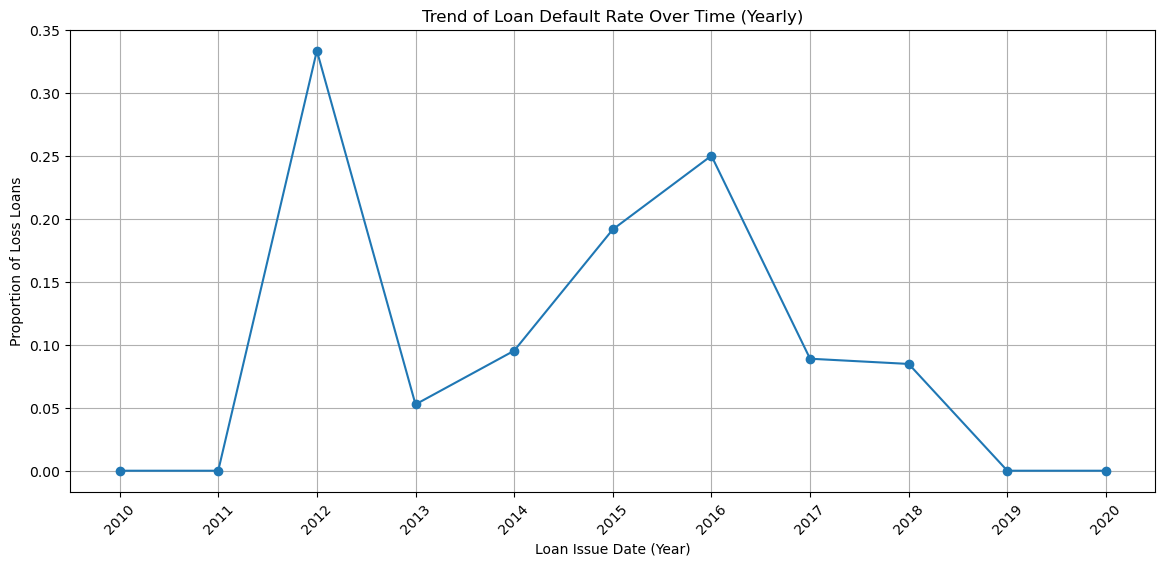

In [52]:
## convert issue_d
sample_df_llama['issue_d'].head()

sample_df_llama['issue_d'].isnull().sum()

sample_df_llama['loan_status'].unique()

# Convert issue_d to datetime
sample_df_llama['issue_d'] = pd.to_datetime(sample_df_llama['issue_d'], format='%b-%Y')
# Group by month-year and calculate the proportion of "loss" loans
loss_rate = sample_df_llama.groupby(sample_df_llama['issue_d'].dt.to_period('Y'))['loan_category'].apply(lambda x: (x == 'Loss').mean())

# Plot the trend
plt.figure(figsize=(14, 6))
#x_labels = loss_rate.index.astype(str)[::4]  # Show every 4th label
plt.plot(loss_rate.index.astype(str), loss_rate.values, marker='o', linestyle='-')
#plt.xticks(ticks=x_labels, rotation=45)
plt.xticks(rotation=45)
plt.xlabel("Loan Issue Date (Year)")
plt.ylabel("Proportion of Loss Loans")
plt.title("Trend of Loan Default Rate Over Time (Yearly)")
plt.grid(True)
plt.show()

In [53]:
# convert issue_d to an Ordinal Feature
sample_df_llama['issue_d_ordinal'] = sample_df_llama['issue_d'].dt.year - sample_df_llama['issue_d'].dt.year.min()
sample_df_llama.drop(columns=['issue_d'], inplace=True)  # Drop original datetime column

## 6. Convert url to Numeric (Drop)
Reason to drop url: 
1. url unaccessible

In [54]:
## loanDetails that requires investor account to login (Unaccessible)
## Drop column
sample_df_llama.drop(columns=["url"], inplace=True)

sample_df_llama.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_category,loan_cat_numerical,description,risk_score_llama,employment_years,risk_label,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_ordinal
2300195,11339,74995397,10825.0,10825.0,10825.0,36 months,17.27%,387.40,D,D2,10+ years,70000.0,Fully Paid,n,credit_card,Credit card refinancing,815xx,CO,24.19,0.0,Oct-1993,725.0,729.0,0.0,12.0,0.0,20225.0,51.2%,26.0,w,0.0,0.0,12778.665097,12778.67,10825.0,1953.67,0.00,0.0,0.0,Jun-2017,7752.86,Mar-2020,709.0,705.0,0.0,1.0,Individual,0.0,0.0,214536.0,3.0,5.0,2.0,5.0,1.0,33795.0,82.0,1.0,2.0,7830.0,67.0,39500.0,0.0,0.0,0.0,7.0,17878.0,13774.0,51.7,0.0,0.0,130.0,269.0,3.0,1.0,3.0,3.0,NaN,0.0,3.0,5.0,4.0,8.0,9.0,6.0,14.0,5.0,12.0,0.0,0.0,0.0,3.0,100.0,50.0,0.0,0.0,254123.0,54020.0,28500.0,41106.0,N,N,Good,1,"I am applying for a $10,825 loan to cover credit card. More specifically, it is for credit card refinancing. I work at senior pastor with over 10 years of experience. My annual income is approximately $70,000. I currently mortgage my home. I have 12 open credit accounts and 26 total credit accounts. I am based in CO.",0.21,10.0,Low Risk (<=0.33),1,0,0,0,1,0,6
965099,126203,140859445,7000.0,7000.0,7000.0,36 months,8.46%,220.85,A,A5,8 years,48000.0,Fully Paid,n,other,Other,721xx,AR,18.98,0.0,Mar-2005,690.0,694.0,0.0,9.0,0.0,5931.0,56%,15.0,w,0.0,0.0,7692.890000,7692.89,7000.0,692.89,0.00,0.0,0.0,May-2020,0.01,May-2020,764.0,760.0,0.0,1.0,Individual,0.0,0.0,105826.0,0.0,2.0,0.0,1.0,13.0,19435.0,82.0,0.0,1.0,1457.0,74.0,10600.0,4.0,1.0,0.0,2.0,11758.0,1641.0,56.8,0.0,0.0,146.0,141.0,13.0,13.0,2.0,46.0,13.0,2.0,2.0,6.0,2.0,3.0,4.0,6.0,9.0,6.0,9.0,0.0,0.0,0.0,0.0,73.3,0.0,0.0,0.0,127554.0,25366.0,3800.0,23854.0,N,N,Good,1,"I am applying for a $7,000 loan to cover other. I work at pro specialist with 8 years of experience. My annual income is approximately $48,000. I currently mortgage my home. I have 9 open credit accounts and 15 total credit accounts. I am based in AR.",0.59,8.0,Medium Risk (0.34–0.66),1,0,0,0,1,0,8
1660463,175048,14579564,13000.0,13000.0,13000.0,36 months,10.99%,425.55,B,B2,1 year,45000.0,Fully Paid,n,debt_consolidation,Debt consolidation,427xx,KY,16.16,0.0,Dec-2001,670.0,674.0,2.0,10.0,0.0,11631.0,54.1%,34.0,f,0.0,0.0,14970.950000,14970.95,13000.0,1949.67,21.28,0.0,0.0,Feb-2016,6013.12,May-2018,614.0,610.0,0.0,1.0,Individual,0.0,0.0,72201.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21500.0,NaN,NaN,NaN,6.0,7220.0,9398.0,45.4,0.0,0.0,132.0,148.0,10.0,4

## 7. Convert Term to Numeric

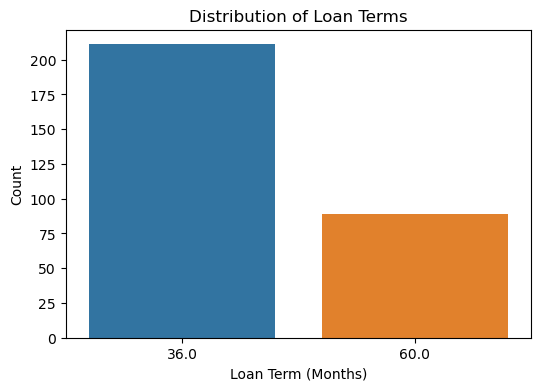

In [55]:
# Check feature Term and convert to numeric
sample_df_llama["term"].unique()

# Convert  numeric 
sample_df_llama["term"] = sample_df_llama["term"].str.extract("(\d+)").astype(float)

# Plot distribution of loan terms
plt.figure(figsize=(6,4))
sns.countplot(x=sample_df_llama["term"])
plt.title("Distribution of Loan Terms")
plt.xlabel("Loan Term (Months)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [56]:
sample_df_llama['term'].head

<bound method NDFrame.head of 2300195    36.0
965099     36.0
1660463    36.0
11061      36.0
1625278    36.0
2348866    36.0
476556     60.0
443261     36.0
2843920    36.0
220453     36.0
661658     60.0
739554     60.0
1405273    36.0
373412     36.0
984196     36.0
406748     36.0
54843      60.0
1104711    60.0
1642703    36.0
785021     36.0
2202187    36.0
1036777    36.0
1972928    60.0
2296536    36.0
586060     36.0
2672224    60.0
288271     36.0
2599233    60.0
2161501    36.0
2038919    60.0
508910     36.0
1912411    36.0
2145953    36.0
130521     36.0
1914608    36.0
393479     60.0
2549042    36.0
2278242    36.0
47633      36.0
2695425    36.0
2507836    36.0
2325174    36.0
1886255    36.0
807302     36.0
1415767    60.0
1691818    60.0
470427     60.0
1244838    60.0
1117963    36.0
371367     36.0
2124495    36.0
2182626    36.0
2605975    36.0
1750515    36.0
1773819    36.0
948470     36.0
1003424    60.0
1156650    60.0
1119973    36.0
785914     36.0
1428136   

## 8. Convert int_rate to Numeric

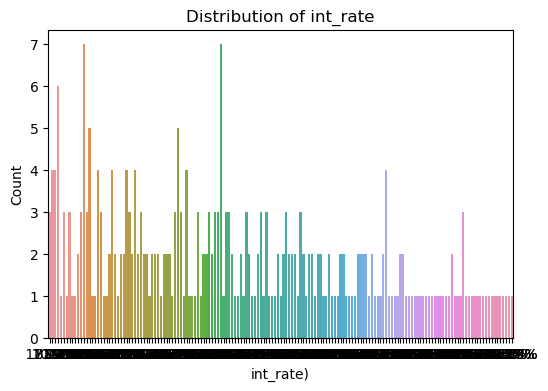

2300195    0.1727
965099     0.0846
1660463    0.1099
11061      0.1349
1625278    0.0839
Name: int_rate, dtype: float64

In [57]:
# Check feature int_rate and convert to numeric
sample_df_llama["int_rate"].unique()

# Plot distribution of int_rate
plt.figure(figsize=(6,4))
sns.countplot(x=sample_df_llama["int_rate"])
plt.title("Distribution of int_rate")
plt.xlabel("int_rate)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Convert
sample_df_llama["int_rate"] = sample_df_llama["int_rate"].replace("nan", np.nan)
sample_df_llama["int_rate"] = sample_df_llama["int_rate"].str.replace("%", "").astype(float) / 100
sample_df_llama["int_rate"].head()

## 9. Convert sub_grade to Numeric (Drop grade)

0


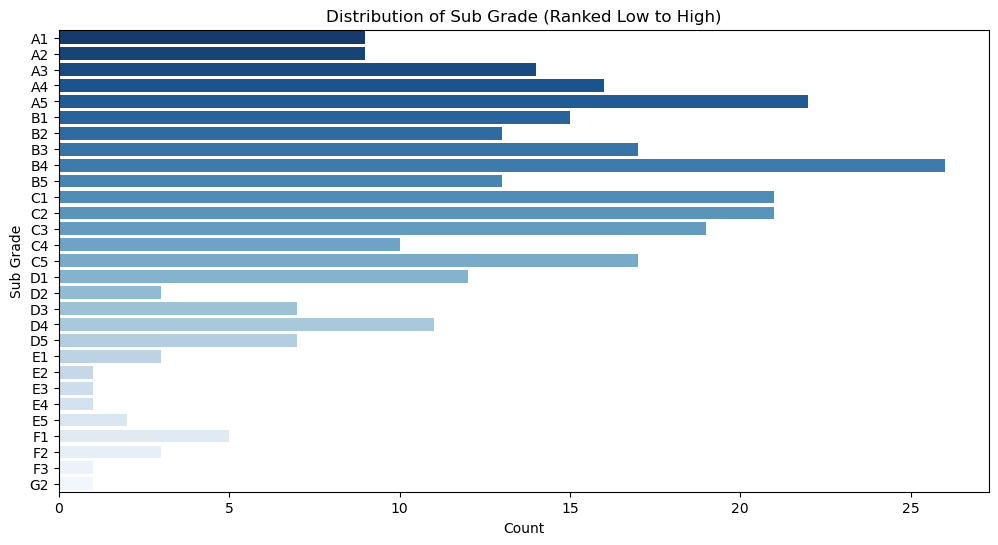

In [58]:
# Check feature grade and subgrade
sample_df_llama["grade"].unique()
sample_df_llama["sub_grade"].unique()

# Possible feature engineering: Combine into one feature A=1, B=2, C=3, D=4, E=5, F=6, G=7 (Smaller number has lower risk)===> 
# Use only converted sub_grade, drop feature grade
sample_df_llama = sample_df_llama.drop(["grade"], axis=1)

# Define base values for grades (lower = better credit, higher = higher risk)
grade_mapping = {"A" :1, "B" : 2, "C" : 3, "D" : 4, "E" : 5, "F" : 6, "G" : 7}

# Convert nan to np.nan
sample_df_llama["sub_grade"] = sample_df_llama["sub_grade"].replace("nan", np.nan)

# Check if has nan valus (1 nan)
sample_df_llama["sub_grade"].isna().sum()

# Check if the original "nan" value converted to np.nan (All converted)
print((sample_df_llama["sub_grade"] == "nan").sum())

# Plot the distribution of sub_grade with proper ranking from low to high
plt.figure(figsize=(12, 6))
sns.countplot(y=sample_df_llama["sub_grade"], order=sorted(sample_df_llama["sub_grade"].unique()), palette="Blues_r")
plt.title("Distribution of Sub Grade (Ranked Low to High)")
plt.xlabel("Count")
plt.ylabel("Sub Grade")
plt.show()


# Convert sub_grade into an ordered numeric feature where A1 is lowest risk and G5 is highest risk
sample_df_llama["sub_grade"] = sample_df_llama["sub_grade"].apply(lambda x: grade_mapping[str(x)[0]] * 10 + int(str(x)[1]) if pd.notna(x) else np.nan)

## 10. Convert emp_length to Numeric

In [59]:
# Check feature emp_length
sample_df_llama["emp_length"].unique()

def convert_emp_length(emp):
    if pd.isna(emp):  # Handle missing values
        return np.nan
    if emp == "10+ years":
        return 10
    elif emp == "< 1 year":
        return 0
    else:
        return int(emp.split()[0])  # Extract the number from "X years"
## Check below for convertion criterion


## Convert emp_length to numeric
sample_df_llama["emp_length"] = sample_df_llama["emp_length"].apply(convert_emp_length)

In [60]:
# Handeling 'purpose', 'title', 'zip_code', 'addr_state',

sample_df_llama["purpose"].unique()

array(['credit_card', 'other', 'debt_consolidation', 'major_purchase',
       'small_business', 'home_improvement', 'car', 'medical', 'vacation',
       'renewable_energy'], dtype=object)

## 11. Convert Purpose to Numeric


In [61]:
# Convert "purpose" from string to numeric
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'purpose' column
sample_df_llama["purpose"] = le.fit_transform(sample_df_llama["purpose"])

# View unique mappings
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

{'car': 0, 'credit_card': 1, 'debt_consolidation': 2, 'home_improvement': 3, 'major_purchase': 4, 'medical': 5, 'other': 6, 'renewable_energy': 7, 'small_business': 8, 'vacation': 9}


## 12.Convert Title to Numeric (Drop)

In [62]:
# Convert 'title' from strings to numeric (Since similar to "Purpose, drop it")
num_unique_titles = sample_df_llama["title"].nunique()
title_counts = sample_df_llama["title"].value_counts()
purpose_counts = sample_df_llama["purpose"].value_counts()

sample_df_llama = sample_df_llama.drop(columns=["title"])

## 13. Convert zip_code, addr_state to Numeric(Drop)

In [63]:
# Convert "zip_code" to numeric
sample_df_llama["zip_code"].unique()

# Drop zip_code
sample_df_llama = sample_df_llama.drop(columns=["zip_code"])

# Drop "addr_state"
sample_df_llama["addr_state"].unique()
sample_df_llama = sample_df_llama.drop(columns=["addr_state"])

## 14. Convert hardship_flag to Numeric (Categorical{0,1})

In [64]:
# Map 'N' to 0 and 'Y' to 1
sample_df_llama["hardship_flag"] = sample_df_llama["hardship_flag"].map({
                                                                          "N": 0, "Y": 1})

sample_df_llama["hardship_flag"].unique()

array([ 0.,  1., nan])

## 15. Convert debt_settlement_flag to Numeric (Categorical{0,1})

In [65]:
# Map 'N' to 0 and 'Y' to 1
sample_df_llama["debt_settlement_flag"] = sample_df_llama["debt_settlement_flag"].map({
                                                                                        "N": 0, "Y": 1})

sample_df_llama["debt_settlement_flag"].unique()

array([0, 1])

## 16. Convert application_type to Numeric

In [66]:
# Map 'Individual' to 0 and 'Joint App' to 1
sample_df_llama["application_type"] = sample_df_llama["application_type"].map(
    {"Individual": 0, "Joint App": 1})

sample_df_llama["application_type"].unique()

array([0, 1])

## 17. Convert last_credit_pull_d to Numeric
Convert date to a numeric measure of recency in days (reference date - credit pull date; smaller is worse)

Reference Date: September 30, 2020 because the dataset appears to be as recent as Q3 2020.

In [67]:
sample_df_llama["last_credit_pull_d"] = pd.to_datetime(
    sample_df_llama["last_credit_pull_d"])

# Define reference date as the end of Q3 2020
reference_date = pd.to_datetime("2020-09-30")

sample_df_llama["last_credit_pull_d"] = (
    reference_date - sample_df_llama["last_credit_pull_d"]).dt.days

sample_df_llama["last_credit_pull_d"].head()

/var/folders/1k/m19_s5vj13nd1vhzx_rcdr780000gn/T/ipykernel_8106/3646483436.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sample_df_llama["last_credit_pull_d"] = pd.to_datetime(


2300195     213
965099      152
1660463     883
11061      1368
1625278     607
Name: last_credit_pull_d, dtype: int64

## 18. Convert earliest_cr_line to Numeric
In credit scoring models (e.g., FICO score), one of the key factors is the length of credit history, which refers to how long the borrower has had a credit account. Lenders care about how long you have had credit not the exactly date.

In [68]:
sample_df_llama["earliest_cr_line"].unique()

array(['Oct-1993', 'Mar-2005', 'Dec-2001', 'Oct-2002', 'Nov-1965',
       'May-1998', 'Mar-1989', 'Sep-1993', 'Jun-2001', 'Apr-2006',
       'Dec-2009', 'Feb-2004', 'Feb-2003', 'Nov-2004', 'Sep-2006',
       'Mar-2006', 'Sep-1995', 'Mar-2008', 'Jan-2000', 'Dec-1992',
       'Dec-1987', 'Aug-2006', 'Aug-1997', 'Oct-2003', 'Feb-1990',
       'Jan-2002', 'Aug-2001', 'Apr-2002', 'Dec-1998', 'May-2000',
       'May-2003', 'Aug-2005', 'Nov-2012', 'Apr-1998', 'Mar-1995',
       'Mar-1999', 'Dec-1966', 'Feb-2001', 'Mar-1996', 'Oct-2004',
       'Nov-2010', 'Sep-1994', 'Jan-2013', 'Mar-1993', 'Jan-1985',
       'Oct-1977', 'Aug-1995', 'Jan-1994', 'Sep-2008', 'May-2005',
       'Nov-1992', 'Dec-1997', 'May-1995', 'Feb-2002', 'Mar-1994',
       'Jan-1999', 'Mar-1979', 'Jan-1996', 'Apr-1994', 'Aug-2003',
       'Feb-2011', 'Jan-1991', 'Apr-1986', 'Jan-2016', 'Oct-1997',
       'Dec-2003', 'Apr-2003', 'Feb-2006', 'Mar-2002', 'Jan-1993',
       'Sep-2009', 'May-2007', 'Apr-2007', 'Jul-2008', 'Jun-19

In [69]:
from datetime import datetime
sample_df_llama["earliest_cr_line"] = pd.to_datetime(sample_df_llama["earliest_cr_line"], format="%b-%Y")
sample_df_llama["earliest_cr_line"] = (
    (datetime.today().year - sample_df_llama["earliest_cr_line"].dt.year) * 12 +
    (datetime.today().month - sample_df_llama["earliest_cr_line"].dt.month)
)

In [70]:
sample_df_llama["earliest_cr_line"].unique()

array([379, 242, 281, 271, 714, 324, 434, 380, 287, 229, 185, 255, 267,
       246, 224, 230, 356, 206, 304, 389, 449, 225, 333, 259, 423, 280,
       285, 277, 317, 300, 264, 237, 150, 325, 362, 314, 701, 291, 350,
       247, 174, 368, 148, 386, 484, 571, 357, 376, 200, 240, 390, 329,
       360, 279, 374, 316, 554, 352, 373, 261, 171, 412, 469, 112, 331,
       257, 265, 231, 278, 388, 188, 216, 217, 202, 371, 275, 232, 382,
       354, 337, 353, 226, 347, 245, 297, 284, 493, 170, 288, 547, 253,
       296, 523, 309, 290, 254, 251, 250, 122, 252, 239, 260, 233, 208,
       312, 163, 436, 186, 123, 125, 320, 358, 293, 365, 195, 282, 194,
       191, 513, 421, 573, 490, 189, 276, 181, 306, 303, 428, 270, 321,
       345, 222, 146, 238, 109, 184, 215, 228, 408, 283, 378, 244, 366,
       431, 361, 127, 272, 359, 407, 214, 475, 658, 249, 520, 177, 318,
       435, 197, 486, 236, 401, 155, 248, 424, 213, 498, 351, 438, 416,
       227, 295, 313, 294, 301, 274, 223, 367, 402, 221], dtype=

## 19. Convert revol_util to Numeric

In [71]:
sample_df_llama["revol_util"].unique()

array(['51.2%', '56%', '54.1%', '75.8%', '37.7%', '39.7%', '24.8%',
       '35.9%', '33.4%', '80.6%', '70%', '58.9%', '20.8%', '78.8%',
       '29.6%', '17.3%', '75.2%', '34.7%', '7.8%', '48.9%', '14.7%',
       '73.7%', '32.9%', '74.4%', '49.6%', '65.1%', '58.8%', '24%',
       '50.9%', '66.5%', '61.5%', '43.7%', '88.5%', '49.8%', '42.9%',
       '30.3%', '13%', '41.1%', '30.2%', '32.1%', '70.4%', '17.2%',
       '13.3%', '84.4%', '30.6%', '87.2%', '4.3%', '31.4%', '77.6%',
       '65.7%', '93.3%', '84.5%', '62.5%', '14.4%', '15.6%', '86.3%',
       '62.6%', '47%', '64.4%', '47.8%', '66.9%', '55.5%', '37.3%',
       '45.6%', '54.9%', '57.2%', '53.7%', '70.5%', '55.9%', '44.6%',
       '42.6%', '24.6%', '43.8%', '55.4%', '22.3%', '77.8%', '73.5%',
       '56.8%', '66.8%', '63.6%', '64.1%', '14.2%', '62.3%', '49.5%',
       '71.4%', '83%', '28.1%', '72.3%', '67.5%', '62.4%', '82.4%', '65%',
       '18.9%', '45.9%', '45.7%', '98.8%', '17.5%', '67.1%', '15.3%',
       '22.8%', '37.2%', '2

In [72]:
sample_df_llama["revol_util"] = pd.to_numeric(sample_df_llama["revol_util"].str.rstrip("%"), errors="coerce") / 100

## 20. Convert initial_list_status to Numeric

In [73]:
# Map 'w' to 0 and 'f' to 1
sample_df_llama["initial_list_status"] = sample_df_llama["initial_list_status"].map({"w": 0, "f": 1})

In [74]:
sample_df_llama["initial_list_status"].unique()

array([0, 1])

## 21. Convert last_pymnt_d to Numeric
Months Since Last Payment = (Current Year − Last Payment Year) × 12 + (Current Month − Last Payment Month)

In [75]:
from datetime import datetime
import pandas as pd

# Ensure the column is in datetime format
sample_df_llama["last_pymnt_d"] = pd.to_datetime(sample_df_llama["last_pymnt_d"], errors='coerce')

# Calculate months since last payment
sample_df_llama["months_since_last_pymnt"] = (
    (datetime.today().year - sample_df_llama["last_pymnt_d"].dt.year) * 12 +
    (datetime.today().month - sample_df_llama["last_pymnt_d"].dt.month)
)

/var/folders/1k/m19_s5vj13nd1vhzx_rcdr780000gn/T/ipykernel_8106/3841703543.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sample_df_llama["last_pymnt_d"] = pd.to_datetime(sample_df_llama["last_pymnt_d"], errors='coerce')


In [76]:
sample_df_llama["months_since_last_pymnt"].unique()

array([ 95.,  60., 111., 129., 101.,  62., 120.,  61.,  88., 136., 102.,
        66.,  99.,  76.,  91.,  82.,  71., 118., 109., 113.,  83., 117.,
        84.,  63., 100., 108.,  86.,  87.,  79., 104.,  98., 119.,  77.,
        70.,  94.,  68., 126.,  85.,  81.,  80., 128.,  92., 146.,  69.,
        93., 138.,  64.,  72.,  73., 124.,  74., 112.,  78.,  65., 127.,
        67.,  59., 107., 110.,  75.,  nan, 114., 135., 103.,  97., 105.,
        89., 115., 116., 130., 152., 145.])

In [77]:
# Check df after column dropping
sample_df_llama.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,annual_inc,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_category,loan_cat_numerical,description,risk_score_llama,employment_years,risk_label,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_ordinal,months_since_last_pymnt
2300195,11339,74995397,10825.0,10825.0,10825.0,36.0,0.1727,387.40,42,10.0,70000.0,Fully Paid,n,1,24.19,0.0,379,725.0,729.0,0.0,12.0,0.0,20225.0,0.512,26.0,0,0.0,0.0,12778.665097,12778.67,10825.0,1953.67,0.00,0.0,0.0,2017-06-01,7752.86,213,709.0,705.0,0.0,1.0,0,0.0,0.0,214536.0,3.0,5.0,2.0,5.0,1.0,33795.0,82.0,1.0,2.0,7830.0,67.0,39500.0,0.0,0.0,0.0,7.0,17878.0,13774.0,51.7,0.0,0.0,130.0,269.0,3.0,1.0,3.0,3.0,NaN,0.0,3.0,5.0,4.0,8.0,9.0,6.0,14.0,5.0,12.0,0.0,0.0,0.0,3.0,100.0,50.0,0.0,0.0,254123.0,54020.0,28500.0,41106.0,0.0,0,Good,1,"I am applying for a $10,825 loan to cover credit card. More specifically, it is for credit card refinancing. I work at senior pastor with over 10 years of experience. My annual income is approximately $70,000. I currently mortgage my home. I have 12 open credit accounts and 26 total credit accounts. I am based in CO.",0.21,10.0,Low Risk (<=0.33),1,0,0,0,1,0,6,95.0
965099,126203,140859445,7000.0,7000.0,7000.0,36.0,0.0846,220.85,15,8.0,48000.0,Fully Paid,n,6,18.98,0.0,242,690.0,694.0,0.0,9.0,0.0,5931.0,0.560,15.0,0,0.0,0.0,7692.890000,7692.89,7000.0,692.89,0.00,0.0,0.0,2020-05-01,0.01,152,764.0,760.0,0.0,1.0,0,0.0,0.0,105826.0,0.0,2.0,0.0,1.0,13.0,19435.0,82.0,0.0,1.0,1457.0,74.0,10600.0,4.0,1.0,0.0,2.0,11758.0,1641.0,56.8,0.0,0.0,146.0,141.0,13.0,13.0,2.0,46.0,13.0,2.0,2.0,6.0,2.0,3.0,4.0,6.0,9.0,6.0,9.0,0.0,0.0,0.0,0.0,73.3,0.0,0.0,0.0,127554.0,25366.0,3800.0,23854.0,0.0,0,Good,1,"I am applying for a $7,000 loan to cover other. I work at pro specialist with 8 years of experience. My annual income is approximately $48,000. I currently mortgage my home. I have 9 open credit accounts and 15 total credit accounts. I am based in AR.",0.59,8.0,Medium Risk (0.34–0.66),1,0,0,0,1,0,8,60.0
1660463,175048,14579564,13000.0,13000.0,13000.0,36.0,0.1099,425.55,22,1.0,45000.0,Fully Paid,n,2,16.16,0.0,281,670.0,674.0,2.0,10.0,0.0,11631.0,0.541,34.0,1,0.0,0.0,14970.950000,14970.95,13000.0,1949.67,21.28,0.0,0.0,2016-02-01,6013.12,883,614.0,610.0,0.0,1.0,0,0.0,0.0,72201.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21500.0,NaN,NaN,NaN,6.0,7220.0,9398.0,45.4,0.0,0.0,132.0,148.0,10.0,4.0,2.0,10.0,1.0,0.0,4.0,5.0,6.0,13.0,8.0,7.0,24.0,5.0,10.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,84937.0,72201.0,17200.0,63437.0,0.0,0,Good,1,"I am applying for a $13,000 loan to cover 

In [78]:
# Select only numeric features before computing correlation
sample_df_numeric = sample_df_llama.select_dtypes(include=["number"])  # Keep only numeric columns

# Compute correlations with target
correlations = sample_df_numeric.corr()["loan_cat_numerical"].dropna().sort_values(ascending=False)

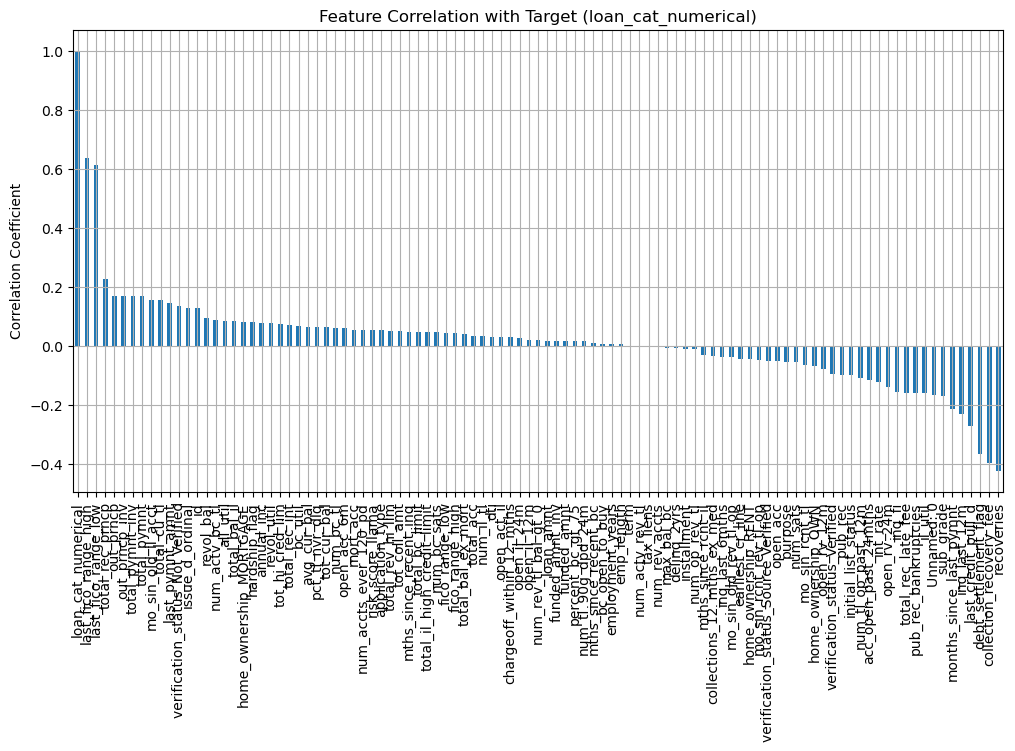

In [79]:
# Plot correlations
plt.figure(figsize=(12, 6))
correlations.plot(kind="bar")
plt.title("Feature Correlation with Target (loan_cat_numerical)")
plt.ylabel("Correlation Coefficient")
plt.grid()
plt.show()

# use the Tinyllama sample dataset for model training

In [80]:
# Split Dataset Randomly
from sklearn.model_selection import train_test_split

# Step 1: Split off untouched data (10%)
df_train_val, df_untouched = train_test_split(sample_df_llama, test_size=0.10, random_state=42)
df_train_val = df_train_val.copy()  # Avoid SettingWithCopyWarning
df_untouched = df_untouched.copy()
df_untouched["set_flag"] = 0  # Mark untouched

# Step 2: Split remaining into train (50%), validation (20%), and test (20%)
df_train, df_temp = train_test_split(df_train_val, test_size=0.40, random_state=42)
df_train = df_train.copy()
df_temp = df_temp.copy()
df_train["set_flag"] = 1  # Mark train

df_val, df_test = train_test_split(df_temp, test_size=0.50, random_state=42)
df_val = df_val.copy()
df_test = df_test.copy()
df_val["set_flag"] = 2  # Mark validation
df_test["set_flag"] = 3  # Mark test

# Combine all subsets back into one dataframe
df_final = pd.concat([df_train, df_val, df_test, df_untouched], ignore_index=True)

# Save as Parquet for efficient storage
df_final.to_parquet("dataset_with_flags.parquet", index=False)

# Check dataset sizes
print(f"Training Set: {len(df_train)} rows ({len(df_train)/len(df)*100:.1f}%)")
print(f"Validation Set: {len(df_val)} rows ({len(df_val)/len(df)*100:.1f}%)")
print(f"Test Set: {len(df_test)} rows ({len(df_test)/len(df)*100:.1f}%)")
print(f"Untouched Set: {len(df_untouched)} rows ({len(df_untouched)/len(df)*100:.1f}%)")

print("Data saved with set_flag column.")

Training Set: 162 rows (0.0%)
Validation Set: 54 rows (0.0%)
Test Set: 54 rows (0.0%)
Untouched Set: 30 rows (0.0%)
Data saved with set_flag column.


In [81]:
# Seperate into pre-loan and post-loan features
# Creating Python lists for categorized features

pre_loan_features_list = [
    "acc_open_past_24mths", "addr_state", "all_util", "annual_inc", "annual_inc_joint",
    "application_type", "avg_cur_bal", "bc_open_to_buy", "bc_util", "dti", "dti_joint",
    "delinq_2yrs", "emp_length", "emp_title", "fico_range_high", "fico_range_low",
    "grade", "home_ownership", "il_util", "inq_fi", "inq_last_12m", "inq_last_6mths",
    "installment", "int_rate", "issue_d", "loan_amnt", "loan_status", "max_bal_bc",
    "mo_sin_old_il_acct", "mo_sin_old_rev_tl_op", "mo_sin_rcnt_rev_tl_op",
    "mo_sin_rcnt_tl", "mort_acc", "mths_since_last_delinq", "mths_since_last_major_derog",
    "mths_since_last_record", "mths_since_rcnt_il", "mths_since_recent_bc",
    "mths_since_recent_bc_dlq", "mths_since_recent_inq", "mths_since_recent_revol_delinq",
    "num_accts_ever_120_pd", "num_actv_bc_tl", "num_actv_rev_tl", "num_bc_sats",
    "num_bc_tl", "num_il_tl", "num_op_rev_tl", "num_rev_accts", "num_rev_tl_bal_gt_0",
    "num_sats", "num_tl_120dpd_2m", "num_tl_30dpd", "num_tl_90g_dpd_24m",
    "open_acc", "open_acc_6m", "orig_projected_additional_accrued_interest",
    "pct_tl_nvr_dlq", "verification_status", "total_acc", "verified_status_joint",
    "term", "total_bal_ex_mort", "pub_rec_bankruptcies", "debt_settlement_flag",
    "tot_cur_bal", "open_act_il", "sec_app_open_acc", "tot_coll_amt", "tax_liens",
    "disbursement_method", "percent_bc_gt_75", "sec_app_num_rev_accts",
    "sec_app_revol_util", "revol_bal_joint", "total_il_high_credit_limit",
    "sec_app_fico_range_low", "sub_grade", "sec_app_mths_since_last_major_derog",
    "sec_app_chargeoff_within_12_mths", "total_bc_limit", "tot_hi_cred_lim",
    "pymnt_plan", "sec_app_fico_range_high", "sec_app_earliest_cr_line",
    "total_bal_il", "purpose", "num_tl_op_past_12m", "member_id", "title",
    "zip_code", "sec_app_open_act_il", "sec_app_collections_12_mths_ex_med",
    "id", "total_rev_hi_lim", "earliest_cr_line", "initial_list_status",
    "total_cu_tl", "open_rv_12m", "pub_rec", "sec_app_inq_last_6mths",
    "funded_amnt", "open_il_12m", "sec_app_mort_acc"
]

post_loan_features_list = [
    "acc_now_delinq", "chargeoff_within_12_mths", "collection_recovery_fee",
    "collections_12_mths_ex_med", "delinq_amnt", "last_credit_pull_d",
    "last_fico_range_high", "last_fico_range_low", "last_pymnt_amnt",
    "last_pymnt_d", "next_pymnt_d", "num_tl_120dpd_2m", "num_tl_30dpd",
    "num_tl_90g_dpd_24m", "out_prncp", "out_prncp_inv", "policy_code",
    "recoveries", "revol_bal", "revol_util", "total_pymnt", "total_pymnt_inv",
    "total_rec_int", "total_rec_prncp", "settlement_percentage",
    "hardship_reason", "desc", "hardship_start_date", "settlement_term",
    "hardship_end_date", "hardship_length", "hardship_last_payment_amount",
    "hardship_dpd", "hardship_payoff_balance_amount", "hardship_amount",
    "deferral_term", "hardship_loan_status", "hardship_flag", "settlement_date",
    "settlement_amount", "hardship_status", "debt_settlement_flag_date",
    "payment_plan_start_date", "open_rv_24m", "settlement_status",
    "total_rec_late_fee", "hardship_type", "url"
]




In [82]:
## Filter pre-loan features
drop_list = list(cols_to_drop)  # Convert Index to list
drop_list.extend(["emp_title", "url", "grade", "title", "zip_code", "addr_state",'verified_status_joint', 'disbursement_method', 'sec_app_mths_since_last_major_derog', 'member_id',"loan_status", "issue_d", "pymnt_plan"])

filter_pre_loan_features = [feature for feature in pre_loan_features_list if feature not in drop_list]

# Ensure only existing features are used
filter_pre_loan_features = [feature for feature in filter_pre_loan_features if feature in df_train.columns]
# Remove leaky variables
leakage_features = ["grade", "sub_grade", "int_rate", "loan_status", "id", "member_id", "issue_d", "funded_amnt", "initial_list_status", "term", "debt_settlement_flag",
                    "num_tl_30dpd", "num_tl_120dpd_2m", "num_tl_90g_dpd_24m", "num_tl_op_past_12m"]
filter_pre_loan_features = [feature for feature in filter_pre_loan_features if feature not in leakage_features]

X_train, y_train = df_train[filter_pre_loan_features], df_train.get("loan_cat_numerical")
X_val, y_val = df_val[filter_pre_loan_features], df_val.get("loan_cat_numerical")
X_test, y_test = df_test[filter_pre_loan_features], df_test.get("loan_cat_numerical")


# Save datasets using pickle
#with open("train_val_test_2.pkl", "wb") as f:
#    pickle.dump((X_train, X_val, X_test, y_train, y_val, y_test), f)

#print("Data split and saved as 'train_val_test_2.pkl' for training in another notebook.")

In [83]:
# Convert categorical features to category dtype for XGBoost
categorical_features = ["purpose", "emp_length"]
for col in categorical_features:
    X_train[col] = X_train[col].astype("category")
    X_val[col] = X_val[col].astype("category")
    X_test[col] = X_test[col].astype("category")


print("Categorical processing complete.")

Categorical processing complete.


/var/folders/1k/m19_s5vj13nd1vhzx_rcdr780000gn/T/ipykernel_8106/3121388708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].astype("category")
/var/folders/1k/m19_s5vj13nd1vhzx_rcdr780000gn/T/ipykernel_8106/3121388708.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[col] = X_val[col].astype("category")
/var/folders/1k/m19_s5vj13nd1vhzx_rcdr780000gn/T/ipykernel_8106/3121388708.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [84]:
print(X_train.dtypes.to_string())


acc_open_past_24mths           float64
all_util                       float64
annual_inc                     float64
application_type                 int64
avg_cur_bal                    float64
bc_open_to_buy                 float64
bc_util                        float64
dti                            float64
delinq_2yrs                    float64
emp_length                    category
fico_range_high                float64
fico_range_low                 float64
il_util                        float64
inq_fi                         float64
inq_last_12m                   float64
inq_last_6mths                 float64
installment                    float64
loan_amnt                      float64
max_bal_bc                     float64
mo_sin_old_il_acct             float64
mo_sin_old_rev_tl_op           float64
mo_sin_rcnt_rev_tl_op          float64
mo_sin_rcnt_tl                 float64
mort_acc                       float64
mths_since_rcnt_il             float64
mths_since_recent_bc     

In [85]:
import xgboost as xgb
# Calculate class imbalance for proper weighting
class_counts = np.bincount(y_train)
print(f"Class distribution: {class_counts}")

# scale_pos_weight gives more weight to the minority class (defaults)
scale_pos_weight = class_counts[0] / class_counts[1]
print(f"Calculated scale_pos_weight: {scale_pos_weight:.2f}")

# Initialize XGBoost classifier with evaluation enabled
xgb_model_sample = xgb.XGBClassifier(
    objective="multi:softmax",  
    num_class=len(y_train.unique()),  
    tree_method="hist",  
    enable_categorical=True,  
    use_label_encoder=False,  
    reg_alpha=5,  
    reg_lambda=2,  
    learning_rate=0.05,  
    max_depth=4,  
    min_child_weight=3,  
    n_estimators=500,  
    early_stopping_rounds=450,  
    eval_metric=["mlogloss", "merror", "auc"],
    scale_pos_weight=scale_pos_weight,
)

# ✅ Train the model with evaluation enabled
xgb_model_sample.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],  # Use train & validation set
    verbose=True  # Show progress
)

print("✅ Model training complete with evaluation results.")


Class distribution: [ 19 143]
Calculated scale_pos_weight: 0.13
[0]	validation_0-mlogloss:0.66595	validation_0-merror:0.13580	validation_0-auc:0.64925	validation_1-mlogloss:0.66482	validation_1-merror:0.12963	validation_1-auc:0.56939
[1]	validation_0-mlogloss:0.64119	validation_0-merror:0.13580	validation_0-auc:0.64925	validation_1-mlogloss:0.63902	validation_1-merror:0.12963	validation_1-auc:0.56939
[2]	validation_0-mlogloss:0.61861	validation_0-merror:0.12963	validation_0-auc:0.64998	validation_1-mlogloss:0.61570	validation_1-merror:0.12963	validation_1-auc:0.56939
[3]	validation_0-mlogloss:0.59771	validation_0-merror:0.12963	validation_0-auc:0.70795	validation_1-mlogloss:0.59495	validation_1-merror:0.12963	validation_1-auc:0.54490
[4]	validation_0-mlogloss:0.57852	validation_0-merror:0.12963	validation_0-auc:0.70795	validation_1-mlogloss:0.57595	validation_1-merror:0.12963	validation_1-auc:0.54490
[5]	validation_0-mlogloss:0.56077	validation_0-merror:0.12963	validation_0-auc:0.73942

/Users/yijiaowang/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [00:04:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[99]	validation_0-mlogloss:0.24757	validation_0-merror:0.11111	validation_0-auc:0.95951	validation_1-mlogloss:0.30792	validation_1-merror:0.09259	validation_1-auc:0.64898
[100]	validation_0-mlogloss:0.24737	validation_0-merror:0.11111	validation_0-auc:0.95951	validation_1-mlogloss:0.30784	validation_1-merror:0.09259	validation_1-auc:0.64898
[101]	validation_0-mlogloss:0.24699	validation_0-merror:0.11111	validation_0-auc:0.95988	validation_1-mlogloss:0.30758	validation_1-merror:0.09259	validation_1-auc:0.64898
[102]	validation_0-mlogloss:0.24681	validation_0-merror:0.11111	validation_0-auc:0.95988	validation_1-mlogloss:0.30750	validation_1-merror:0.09259	validation_1-auc:0.64898
[103]	validation_0-mlogloss:0.24624	validation_0-merror:0.11111	validation_0-auc:0.95988	validation_1-mlogloss:0.30762	validation_1-merror:0.09259	validation_1-auc:0.64898
[104]	validation_0-mlogloss:0.24575	validation_0-merror:0.11111	validation_0-auc:0.96025	validation_1-mlogloss:0.30773	validation_1-merror:0.

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
y_train_pred = xgb_model_sample.predict(X_train)
y_val_pred = xgb_model_sample.predict(X_val)
y_test_pred = xgb_model_sample.predict(X_test)

# Compute accuracy metrics
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Compute precision, recall, and F1-score for validation set
precision_val = precision_score(y_val, y_val_pred, average="weighted")
recall_val = recall_score(y_val, y_val_pred, average="weighted")
f1_val = f1_score(y_val, y_val_pred, average="weighted")

# Display results
accuracy_results = {
    "Train Accuracy": accuracy_train,
    "Validation Accuracy": accuracy_val,
    "Test Accuracy": accuracy_test,
    "Validation Precision": precision_val,
    "Validation Recall": recall_val,
    "Validation F1-score": f1_val
}

accuracy_results


/Users/yijiaowang/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Train Accuracy': 0.8888888888888888,
 'Validation Accuracy': 0.9074074074074074,
 'Test Accuracy': 0.9074074074074074,
 'Validation Precision': 0.8233882030178327,
 'Validation Recall': 0.9074074074074074,
 'Validation F1-score': 0.8633585041352032}

In [88]:
# Get feature importance scores
feature_importance = xgb_model_sample.get_booster().get_score(importance_type="weight")

# Convert to DataFrame for better readability
importance_df = pd.DataFrame(
    feature_importance.items(),
    columns=["Feature", "Importance"]
).sort_values(by="Importance", ascending=False)

print(importance_df.to_string())

                       Feature  Importance
28                 total_cu_tl       107.0
4                      bc_util        68.0
26             tot_hi_cred_lim        58.0
10                   loan_amnt        56.0
9                       inq_fi        53.0
19                    num_sats        48.0
5                          dti        40.0
13        mo_sin_old_rev_tl_op        37.0
0         acc_open_past_24mths        34.0
7              fico_range_high        31.0
6                   emp_length        30.0
23                 tot_cur_bal        26.0
12          mo_sin_old_il_acct        21.0
24  total_il_high_credit_limit        18.0
3               bc_open_to_buy        16.0
17                   num_il_tl        16.0
20                   total_acc        16.0
15          mths_since_rcnt_il        14.0
27                     purpose        13.0
8                      il_util        13.0
16        mths_since_recent_bc        11.0
11                  max_bal_bc        10.0
14         

# Add tinyllama score as a new feature and re-run

In [89]:
pre_loan_features_list_update = [
    "acc_open_past_24mths", "addr_state", "all_util", "annual_inc", "annual_inc_joint",
    "application_type", "avg_cur_bal", "bc_open_to_buy", "bc_util", "dti", "dti_joint",
    "delinq_2yrs", "emp_length", "emp_title", "fico_range_high", "fico_range_low",
    "grade", "home_ownership", "il_util", "inq_fi", "inq_last_12m", "inq_last_6mths",
    "installment", "int_rate", "issue_d", "loan_amnt", "loan_status", "max_bal_bc",
    "mo_sin_old_il_acct", "mo_sin_old_rev_tl_op", "mo_sin_rcnt_rev_tl_op",
    "mo_sin_rcnt_tl", "mort_acc", "mths_since_last_delinq", "mths_since_last_major_derog",
    "mths_since_last_record", "mths_since_rcnt_il", "mths_since_recent_bc",
    "mths_since_recent_bc_dlq", "mths_since_recent_inq", "mths_since_recent_revol_delinq",
    "num_accts_ever_120_pd", "num_actv_bc_tl", "num_actv_rev_tl", "num_bc_sats",
    "num_bc_tl", "num_il_tl", "num_op_rev_tl", "num_rev_accts", "num_rev_tl_bal_gt_0",
    "num_sats", "num_tl_120dpd_2m", "num_tl_30dpd", "num_tl_90g_dpd_24m",
    "open_acc", "open_acc_6m", "orig_projected_additional_accrued_interest",
    "pct_tl_nvr_dlq", "verification_status", "total_acc", "verified_status_joint",
    "term", "total_bal_ex_mort", "pub_rec_bankruptcies", "debt_settlement_flag",
    "tot_cur_bal", "open_act_il", "sec_app_open_acc", "tot_coll_amt", "tax_liens",
    "disbursement_method", "percent_bc_gt_75", "sec_app_num_rev_accts",
    "sec_app_revol_util", "revol_bal_joint", "total_il_high_credit_limit",
    "sec_app_fico_range_low", "sub_grade", "sec_app_mths_since_last_major_derog",
    "sec_app_chargeoff_within_12_mths", "total_bc_limit", "tot_hi_cred_lim",
    "pymnt_plan", "sec_app_fico_range_high", "sec_app_earliest_cr_line",
    "total_bal_il", "purpose", "num_tl_op_past_12m", "member_id", "title",
    "zip_code", "sec_app_open_act_il", "sec_app_collections_12_mths_ex_med",
    "id", "total_rev_hi_lim", "earliest_cr_line", "initial_list_status",
    "total_cu_tl", "open_rv_12m", "pub_rec", "sec_app_inq_last_6mths",
    "funded_amnt", "open_il_12m", "sec_app_mort_acc", "risk_score_llama"	
]

In [90]:
## Filter pre-loan features
drop_list = list(cols_to_drop)  # Convert Index to list
drop_list.extend(["emp_title", "url", "grade", "title", "zip_code", "addr_state",'verified_status_joint', 'disbursement_method', 'sec_app_mths_since_last_major_derog', 'member_id',"loan_status", "issue_d", "pymnt_plan"])

filter_pre_loan_features1 = [feature for feature in pre_loan_features_list_update if feature not in drop_list]

# Ensure only existing features are used
filter_pre_loan_features1 = [feature for feature in filter_pre_loan_features1 if feature in df_train.columns]
# Remove leaky variables
leakage_features = ["grade", "sub_grade", "int_rate", "loan_status", "id", "member_id", "issue_d", "funded_amnt", "initial_list_status", "term", "debt_settlement_flag",
                    "num_tl_30dpd", "num_tl_120dpd_2m", "num_tl_90g_dpd_24m", "num_tl_op_past_12m"]
filter_pre_loan_features1 = [feature for feature in filter_pre_loan_features1 if feature not in leakage_features]

X_train_llama, y_train_llama = df_train[filter_pre_loan_features1], df_train.get("loan_cat_numerical")
X_val_llama, y_val_llama = df_val[filter_pre_loan_features1], df_val.get("loan_cat_numerical")
X_test_llama, y_test_llama = df_test[filter_pre_loan_features1], df_test.get("loan_cat_numerical")

In [91]:
categorical_features = ["purpose", "emp_length"]
for col in categorical_features:
    X_train_llama[col] = X_train_llama[col].astype("category")
    X_val_llama[col] = X_val_llama[col].astype("category")
    X_test_llama[col] = X_test_llama[col].astype("category")


print("Categorical processing complete.")

Categorical processing complete.


/var/folders/1k/m19_s5vj13nd1vhzx_rcdr780000gn/T/ipykernel_8106/3024018745.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_llama[col] = X_train_llama[col].astype("category")
/var/folders/1k/m19_s5vj13nd1vhzx_rcdr780000gn/T/ipykernel_8106/3024018745.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val_llama[col] = X_val_llama[col].astype("category")
/var/folders/1k/m19_s5vj13nd1vhzx_rcdr780000gn/T/ipykernel_8106/3024018745.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [92]:
# Calculate class imbalance for proper weighting
class_counts = np.bincount(y_train_llama)
print(f"Class distribution: {class_counts}")
# scale_pos_weight gives more weight to the minority class (defaults)
scale_pos_weight = class_counts[0] / class_counts[1]
print(f"Calculated scale_pos_weight: {scale_pos_weight:.2f}")

# Initialize XGBoost classifier with evaluation enabled
xgb_model_llama = xgb.XGBClassifier(
    objective="multi:softmax",  
    num_class=len(y_train_llama.unique()),  
    tree_method="hist",  
    enable_categorical=True,  
    use_label_encoder=False,  
    reg_alpha=5,  
    reg_lambda=2,  
    learning_rate=0.05,  
    max_depth=4,  
    min_child_weight=3,  
    n_estimators=500,  
    early_stopping_rounds=450,  
    eval_metric=["mlogloss", "merror", "auc"],
    scale_pos_weight=scale_pos_weight,
)

# ✅ Train the model with evaluation enabled
xgb_model_llama.fit(
    X_train_llama, y_train_llama,
    eval_set=[(X_train_llama, y_train_llama), (X_val_llama, y_val_llama)],  # Use train & validation set
    verbose=True  # Show progress
)

print("✅ Model training complete with evaluation results.")


Class distribution: [ 19 143]
Calculated scale_pos_weight: 0.13
[0]	validation_0-mlogloss:0.66510	validation_0-merror:0.14198	validation_0-auc:0.71421	validation_1-mlogloss:0.66299	validation_1-merror:0.11111	validation_1-auc:0.66939
[1]	validation_0-mlogloss:0.63955	validation_0-merror:0.14198	validation_0-auc:0.71421	validation_1-mlogloss:0.63551	validation_1-merror:0.11111	validation_1-auc:0.66939
[2]	validation_0-mlogloss:0.61627	validation_0-merror:0.13580	validation_0-auc:0.71531	validation_1-mlogloss:0.61068	validation_1-merror:0.11111	validation_1-auc:0.66939
[3]	validation_0-mlogloss:0.59490	validation_0-merror:0.13580	validation_0-auc:0.71531	validation_1-mlogloss:0.58766	validation_1-merror:0.11111	validation_1-auc:0.66939
[4]	validation_0-mlogloss:0.57528	validation_0-merror:0.13580	validation_0-auc:0.71531	validation_1-mlogloss:0.56653	validation_1-merror:0.11111	validation_1-auc:0.66939
[5]	validation_0-mlogloss:0.55727	validation_0-merror:0.13580	validation_0-auc:0.71531

/Users/yijiaowang/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [00:05:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[99]	validation_0-mlogloss:0.23985	validation_0-merror:0.11111	validation_0-auc:0.97387	validation_1-mlogloss:0.30612	validation_1-merror:0.09259	validation_1-auc:0.66327
[100]	validation_0-mlogloss:0.23965	validation_0-merror:0.11111	validation_0-auc:0.97424	validation_1-mlogloss:0.30605	validation_1-merror:0.09259	validation_1-auc:0.66327
[101]	validation_0-mlogloss:0.23925	validation_0-merror:0.11111	validation_0-auc:0.97424	validation_1-mlogloss:0.30584	validation_1-merror:0.09259	validation_1-auc:0.66327
[102]	validation_0-mlogloss:0.23878	validation_0-merror:0.11111	validation_0-auc:0.97497	validation_1-mlogloss:0.30584	validation_1-merror:0.09259	validation_1-auc:0.66327
[103]	validation_0-mlogloss:0.23859	validation_0-merror:0.11111	validation_0-auc:0.97497	validation_1-mlogloss:0.30578	validation_1-merror:0.09259	validation_1-auc:0.66327
[104]	validation_0-mlogloss:0.23820	validation_0-merror:0.11111	validation_0-auc:0.97460	validation_1-mlogloss:0.30567	validation_1-merror:0.

In [93]:
# Make predictions
y_train_pred_llama_ = xgb_model_llama.predict(X_train_llama)
y_val_pred_llama = xgb_model_llama.predict(X_val_llama)
y_test_pred_llama = xgb_model_llama.predict(X_test_llama)

# Compute accuracy metrics
accuracy_train_llama = accuracy_score(y_train_llama, y_train_pred_llama_)
accuracy_val_llama = accuracy_score(y_val_llama, y_val_pred_llama)
accuracy_test_llama = accuracy_score(y_test_llama, y_test_pred_llama)

# Compute precision, recall, and F1-score for validation set
precision_val_llama = precision_score(y_val_llama, y_val_pred_llama, average="weighted")
recall_val_llama = recall_score(y_val_llama, y_val_pred_llama, average="weighted")
f1_val_llama = f1_score(y_val_llama, y_val_pred_llama, average="weighted")

# Display results
accuracy_results_llama = {
    "Train Accuracy": accuracy_train_llama,
    "Validation Accuracy": accuracy_val_llama,
    "Test Accuracy": accuracy_test_llama,
    "Validation Precision": precision_val_llama,
    "Validation Recall": recall_val_llama,
    "Validation F1-score": f1_val_llama
}

accuracy_results_llama


/Users/yijiaowang/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Train Accuracy': 0.8950617283950617,
 'Validation Accuracy': 0.9074074074074074,
 'Test Accuracy': 0.9259259259259259,
 'Validation Precision': 0.8233882030178327,
 'Validation Recall': 0.9074074074074074,
 'Validation F1-score': 0.8633585041352032}

In [94]:
# Get feature importance scores
feature_importance_llama= xgb_model_llama.get_booster().get_score(importance_type="weight")

# Convert to DataFrame for better readability
importance_df_llama = pd.DataFrame(
    feature_importance_llama.items(),
    columns=["Feature", "Importance"]
).sort_values(by="Importance", ascending=False)

print(importance_df_llama.to_string())

                       Feature  Importance
29                 total_cu_tl       206.0
30            risk_score_llama       130.0
5                          dti        58.0
4                      bc_util        54.0
21                    num_sats        44.0
8                      il_util        33.0
27             tot_hi_cred_lim        31.0
25  total_il_high_credit_limit        30.0
9                       inq_fi        30.0
7              fico_range_high        28.0
13          mo_sin_old_il_acct        28.0
12                   loan_amnt        26.0
0         acc_open_past_24mths        26.0
17          mths_since_rcnt_il        20.0
22                   total_acc        18.0
19                   num_il_tl        17.0
24                 tot_cur_bal        14.0
3               bc_open_to_buy        10.0
11                 installment        10.0
1                     all_util        10.0
14        mo_sin_old_rev_tl_op         9.0
18        mths_since_recent_bc         8.0
28         

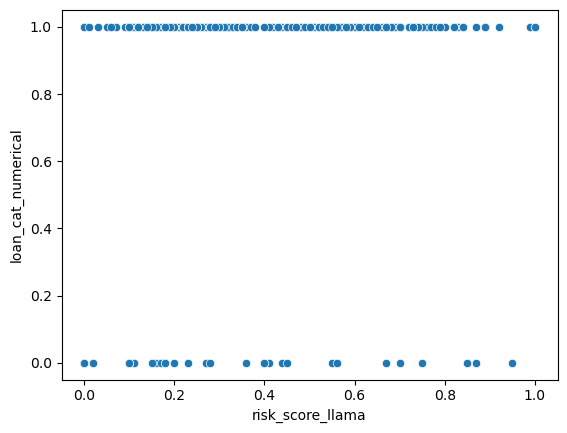

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='risk_score_llama', y='loan_cat_numerical', data=sample_df_llama)
plt.show()
